In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('data_cleaned_2021.csv')

Importing the dataset and viewing its shape, columns, etc

In [3]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [4]:
df.shape

(742, 42)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

there are too many columns, some of them are for sure not needed or representing similar findings

In [6]:
df['Avg Salary(K)']

0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
       ...  
737     84.5
738    102.5
739     73.5
740    127.5
741     93.5
Name: Avg Salary(K), Length: 742, dtype: float64

In [7]:
df['Hourly'].value_counts()

0    718
1     24
Name: Hourly, dtype: int64

In [8]:
df['Job Title'].value_counts()

Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Data Analyst - Asset Management      1
Machine Learning Engineer (NLP)      1
Name: Job Title, Length: 264, dtype: int64

In [9]:
df['Job Description']

0      Data Scientist\nLocation: Albuquerque, NM\nEdu...
1      What You Will Do:\n\nI. General Summary\n\nThe...
2      KnowBe4, Inc. is a high growth information sec...
3      *Organization and Job ID**\nJob ID: 310709\n\n...
4      Data Scientist\nAffinity Solutions / Marketing...
                             ...                        
737    Site Name: USA - Massachusetts - Cambridge\nPo...
738    THE CHALLENGE\nEventbrite has a world-class da...
739    The Auton Lab at Carnegie Mellon University is...
740    Data Science ManagerResponsibilities:\n\nOvers...
741    Returning Candidate? Log back in to the Career...
Name: Job Description, Length: 742, dtype: object

job description has many words but saying what we already know, the job title

In [10]:
df['Industry'].value_counts().head()

Biotech & Pharmaceuticals           112
Insurance Carriers                   63
Computer Hardware & Software         59
IT Services                          50
Health Care Services & Hospitals     49
Name: Industry, dtype: int64

In [11]:
df['Sector'].value_counts().head()

Information Technology       180
Biotech & Pharmaceuticals    112
Business Services             97
Insurance                     69
Health Care                   49
Name: Sector, dtype: int64

then we have industry and sector which are overlapping in my opinion. moreover, industry has too many unique values

In [12]:
df['Revenue'].value_counts().head()

Unknown / Non-Applicable            204
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
Name: Revenue, dtype: int64

In [13]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [14]:
df['Location'].nunique()

200

In [15]:
df['Company Name'].nunique()

343

In [16]:
df['seniority_by_title'].value_counts()

na    519
sr    220
jr      3
Name: seniority_by_title, dtype: int64

In [17]:
df['job_title_sim'].value_counts()

data scientist                    313
other scientist                   143
data engineer                     119
analyst                           101
machine learning engineer          22
Data scientist project manager     16
na                                 10
data analitics                      8
data modeler                        5
director                            5
Name: job_title_sim, dtype: int64

In [18]:
df['Job Title'].value_counts()

Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Data Analyst - Asset Management      1
Machine Learning Engineer (NLP)      1
Name: Job Title, Length: 264, dtype: int64

In [19]:
df['Job Title'].nunique()

264

In [20]:
df['Hourly'].value_counts()

0    718
1     24
Name: Hourly, dtype: int64

In [21]:
df['Industry'].nunique()

60

In [22]:
df['Industry'].value_counts().head(10)

Biotech & Pharmaceuticals                  112
Insurance Carriers                          63
Computer Hardware & Software                59
IT Services                                 50
Health Care Services & Hospitals            49
Enterprise Software & Network Solutions     42
Internet                                    29
Consulting                                  29
Aerospace & Defense                         25
Advertising & Marketing                     25
Name: Industry, dtype: int64

In [23]:
df['Sector'].nunique()

25

In [24]:
df['Sector'].value_counts().head(10)

Information Technology       180
Biotech & Pharmaceuticals    112
Business Services             97
Insurance                     69
Health Care                   49
Finance                       42
Manufacturing                 34
Aerospace & Defense           25
Education                     23
Retail                        15
Name: Sector, dtype: int64

In [25]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            204
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
$50 to $100 million (USD)            46
$25 to $50 million (USD)             40
$2 to $5 billion (USD)               39
$10 to $25 million (USD)             32
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$1 to $5 million (USD)                8
Less than $1 million (USD)            4
Name: Revenue, dtype: int64

In [26]:
df['company_txt'].value_counts()

MassMutual                                         14
Reynolds American                                  14
Takeda Pharmaceuticals                             14
Software Engineering Institute                     11
PNNL                                               10
                                                   ..
Dayton Freight Lines, Inc.                          1
Community Action Partnership of San Luis Obispo     1
TrueAccord                                          1
DRB Systems                                         1
Fivestars                                           1
Name: company_txt, Length: 343, dtype: int64

In [27]:
df['Competitors'].value_counts()

-1                                                                                              460
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
                                                                                               ... 
BrowserStack, Selenium Master, Perfecto Mobile                                                    1
Boeing, Northrop Grumman, Raytheon                                                                1
Unilever, Procter & Gamble, Henkel                                                                1
TASC, Vencore, Booz Allen Hamilton                                                                1


In [28]:
df['Employer provided'].value_counts()

0    725
1     17
Name: Employer provided, dtype: int64

In [29]:
df['Type of ownership'].value_counts()

Company - Private                 410
Company - Public                  193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Government                         15
Hospital                           15
College / University               13
Other Organization                  5
School / School District            2
Name: Type of ownership, dtype: int64

In [30]:
df['Degree'].value_counts()

na    383
M     252
P     107
Name: Degree, dtype: int64

In [31]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

as there are too many variables we pick some of them and make a new dataframe

In [32]:
df1=df[['Rating', 'Size', 'Type of ownership',  'Sector', 'Revenue', 'Hourly', 'Employer provided', 
       'Avg Salary(K)',   'Age', 'Python','spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an','job_title_sim', 'seniority_by_title', 'Degree']]

In [33]:
df1.head()

,Rating,Size,Type of ownership,Sector,Revenue,Hourly,Employer provided,Avg Salary(K),Age,Python,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,3.8,501 - 1000,Company - Private,Aerospace & Defense,$50 to $100 million (USD),0,0,72.0,48,1,...,0,0,1,1,0,0,0,data scientist,na,M
1,3.4,10000+,Other Organization,Health Care,$2 to $5 billion (USD),0,0,87.5,37,1,...,0,0,0,0,0,0,0,data scientist,na,M
2,4.8,501 - 1000,Company - Private,Business Services,$100 to $500 million (USD),0,0,85.0,11,1,...,0,0,0,0,0,0,0,data scientist,na,M
3,3.8,1001 - 5000,Government,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,0,76.5,56,1,...,0,0,0,0,0,0,0,data scientist,na,na
4,2.9,51 - 200,Company - Private,Business Services,Unknown / Non-Applicable,0,0,114.5,23,1,...,0,0,0,0,0,0,0,data scientist,na,na


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rating              742 non-null    float64
 1   Size                742 non-null    object 
 2   Type of ownership   742 non-null    object 
 3   Sector              742 non-null    object 
 4   Revenue             742 non-null    object 
 5   Hourly              742 non-null    int64  
 6   Employer provided   742 non-null    int64  
 7   Avg Salary(K)       742 non-null    float64
 8   Age                 742 non-null    int64  
 9   Python              742 non-null    int64  
 10  spark               742 non-null    int64  
 11  aws                 742 non-null    int64  
 12  excel               742 non-null    int64  
 13  sql                 742 non-null    int64  
 14  sas                 742 non-null    int64  
 15  keras               742 non-null    int64  
 16  pytorch 

In [35]:
df1.columns

Index(['Rating', 'Size', 'Type of ownership', 'Sector', 'Revenue', 'Hourly',
       'Employer provided', 'Avg Salary(K)', 'Age', 'Python', 'spark', 'aws',
       'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop',
       'tableau', 'bi', 'flink', 'mongo', 'google_an', 'job_title_sim',
       'seniority_by_title', 'Degree'],
      dtype='object')

In [36]:
lst=['Size','Type of ownership', 'Sector', 'Revenue', 'Hourly',
       'Employer provided','job_title_sim',
       'seniority_by_title', 'Degree']

In [37]:
for i in lst:
    df1[i]=df1[i].astype('category')

<ipython-input-37-49b41da91be8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=df1[i].astype('category')
<ipython-input-37-49b41da91be8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=df1[i].astype('category')
<ipython-input-37-49b41da91be8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Rating              742 non-null    float64 
 1   Size                742 non-null    category
 2   Type of ownership   742 non-null    category
 3   Sector              742 non-null    category
 4   Revenue             742 non-null    category
 5   Hourly              742 non-null    category
 6   Employer provided   742 non-null    category
 7   Avg Salary(K)       742 non-null    float64 
 8   Age                 742 non-null    int64   
 9   Python              742 non-null    int64   
 10  spark               742 non-null    int64   
 11  aws                 742 non-null    int64   
 12  excel               742 non-null    int64   
 13  sql                 742 non-null    int64   
 14  sas                 742 non-null    int64   
 15  keras               742 non-null    int6

In [39]:
df1.isnull().sum()

Rating                0
Size                  0
Type of ownership     0
Sector                0
Revenue               0
Hourly                0
Employer provided     0
Avg Salary(K)         0
Age                   0
Python                0
spark                 0
aws                   0
excel                 0
sql                   0
sas                   0
keras                 0
pytorch               0
scikit                0
tensor                0
hadoop                0
tableau               0
bi                    0
flink                 0
mongo                 0
google_an             0
job_title_sim         0
seniority_by_title    0
Degree                0
dtype: int64

In [40]:
df1.corr()

,Rating,Avg Salary(K),Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
Rating,1.000000,0.012475,0.023162,0.144665,0.156982,0.117049,-0.036466,0.134463,0.000324,0.076893,0.058564,0.110033,0.069042,0.145098,0.001717,0.039784,0.048338,0.035587,-0.019351
Avg Salary(K),0.012475,1.000000,0.022076,0.315552,0.170678,0.172660,-0.072323,0.002008,0.101938,0.115658,0.044759,0.178237,0.160098,0.110562,-0.074753,-0.044491,0.085859,0.070925,-0.123306
Age,0.023162,0.022076,1.000000,-0.098626,-0.102418,-0.033111,0.038846,-0.117977,0.030657,-0.065947,-0.039562,-0.081608,-0.055830,-0.053311,-0.055828,0.020544,-0.058273,0.044605,-0.058240
Python,0.144665,0.315552,-0.098626,1.000000,0.347619,0.203221,-0.021519,0.373999,0.086607,0.190566,0.113676,0.254331,0.209430,0.235114,0.154118,0.167770,0.063615,0.080035,-0.027705
spark,0.156982,0.170678,-0.102418,0.347619,1.000000,0.298822,-0.047334,0.261304,-0.055031,0.107790,0.032138,0.271394,0.237612,0.537081,-0.018655,-0.044026,0.216880,0.232356,-0.051017
aws,0.117049,0.172660,-0.033111,0.203221,0.298822,1.000000,-0.019235,0.106902,-0.140850,0.132776,0.110025,0.087712,0.116905,0.276749,-0.000834,0.032589,0.154647,0.177929,-0.077330
excel,-0.036466,-0.072323,0.038846,-0.021519,-0.047334,-0.019235,1.000000,0.109548,0.052017,-0.030136,-0.065215,-0.023238,-0.078846,0.022847,0.145915,0.068613,-0.028762,0.094860,0.112628
sql,0.134463,0.002008,-0.117977,0.373999,0.261304,0.106902,0.109548,1.000000,0.200788,0.015975,-0.011757,0.096994,0.037589,0.278207,0.379234,0.248244,-0.049602,0.198825,0.056085
sas,0.000324,0.101938,0.030657,0.086607,-0.055031,-0.140850,0.052017,0.200788,1.000000,-0.063016,-0.052381,0.021811,-0.054448,-0.076515,0.152072,0.054106,-0.036521,0.102419,0.095853
keras,0.076893,0.115658,-0.065947,0.190566,0.107790,0.132776,-0.030136,0.015975,-0.063016,1.000000,0.357628,0.505696,0.544731,0.002864,-0.031054,-0.057622,-0.023572,0.049647,0.023145


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

we see no big correlation between variables of df1

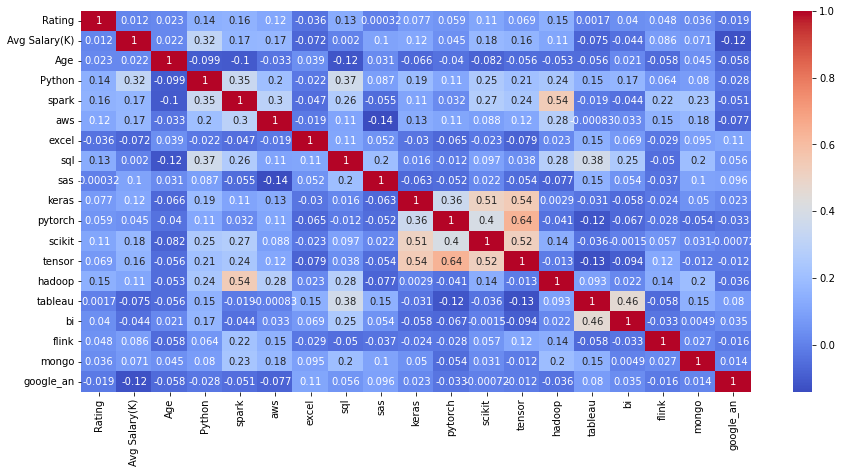

In [42]:
plt.figure(figsize=(15, 7))
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm");

In [43]:
X=df1[[ 'Hourly', 'Age',
       'Employer provided',   'job_title_sim',
       'seniority_by_title', 'Degree']]

In [44]:
y=df1['Avg Salary(K)']

In [43]:
X=df1[[ 'Hourly',
       'Employer provided',  'Age', 'Python',  'aws',
       'sql', 'sas',  'pytorch', 'tensor', 
        'mongo',  
       'seniority_by_title', 'Degree']]

In [44]:
y=df1['Avg Salary(K)']

In [45]:
X = pd.get_dummies(X, drop_first=True)

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr=LinearRegression()

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

In [51]:
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
lr.fit(X,y)

LinearRegression()

In [53]:
lr_pred=lr.predict(X_test)

C:\Users\vasia\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [54]:
lr.score(X,y)

0.41875409117659135

In [55]:
import statsmodels.api as sm

In [56]:
X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Avg Salary(K)   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     32.65
Date:                Tue, 24 May 2022   Prob (F-statistic):           1.56e-74
Time:                        10:29:50   Log-Likelihood:                -3540.0
No. Observations:                 742   AIC:                             7114.
Df Residuals:                     725   BIC:                             7192.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=3, interaction_only=True)
X_train5 = poly.fit_transform(X_train)
X_test5 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train5, y_train)

y_pred = poly_clf.predict(X_test5)

print(poly_clf.score(X_train5, y_train))

0.5439325018653918


In [54]:
lr.score(X,y)

0.3253906438069757

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=3, interaction_only=True)
X_train5 = poly.fit_transform(X_train)
X_test5 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train5, y_train)

y_pred = poly_clf.predict(X_test5)

print(poly_clf.score(X_train5, y_train))

0.5439821726625487


Results of course are not impressive as far

If we had many variables, we have had overfitting and we lack explainability, so we are going to run a new notebook, where we will do extensive feature engineering in order to get the explaination we need and have a more compact dataset